In [1]:
# Dependencies
import requests
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from pprint import pprint
from citipy import citipy
import json
from api_rona import covid_key
import matplotlib.dates as mdates
from scipy.stats import linregress
import seaborn as sns
import numpy as np


print(covid_key)

url = "https://api.covidactnow.org/v2/county/29095.timeseries.json?apiKey=" + covid_key + "&t="
print(url)


93a5df723f214f0f9dac171c43b18a1b
https://api.covidactnow.org/v2/county/29095.timeseries.json?apiKey=93a5df723f214f0f9dac171c43b18a1b&t=


In [2]:
response = requests.get(url).json()
response

{'fips': '29095',
 'country': 'USA',
 'state': 'MO',
 'county': 'Jackson County',
 'level': 'county',
 'lat': None,
 'locationId': 'iso1:us#iso2:us-mo#fips:29095',
 'long': None,
 'population': 703011,
 'metrics': {'testPositivityRatio': 0.0412,
  'testPositivityRatioDetails': {'source': 'other'},
  'caseDensity': 3.5561321231104492,
  'contactTracerCapacityRatio': None,
  'infectionRate': 0.739313708283,
  'infectionRateCI90': 0.23246422494100005,
  'icuHeadroomRatio': 0.3273257541913956,
  'icuHeadroomDetails': {'currentIcuCovid': 35,
   'currentIcuCovidMethod': 'estimated',
   'currentIcuNonCovid': 128,
   'currentIcuNonCovidMethod': 'estimated_from_typical_utilization'},
  'icuCapacityRatio': 0.7948408287628982,
  'vaccinationsInitiatedRatio': 0.10798124069182417,
  'vaccinationsCompletedRatio': 0.05352405581135999},
 'riskLevels': {'overall': 1,
  'testPositivityRatio': 1,
  'caseDensity': 1,
  'contactTracerCapacityRatio': 4,
  'infectionRate': 0,
  'icuHeadroomRatio': 0,
  'icuC

In [3]:
state_df = pd.DataFrame(response['actualsTimeseries'])
state_df

,cases,deaths,positiveTests,negativeTests,contactTracers,hospitalBeds,icuBeds,newCases,date,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted
0,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-22,NaN,NaN,NaN
1,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-23,NaN,NaN,NaN
2,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-24,NaN,NaN,NaN
3,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-25,NaN,NaN,NaN
4,NaN,NaN,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",NaN,2020-01-26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
404,30137.0,381.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",6.0,2021-03-01,NaN,75912.0,37628.0
405,30173.0,382.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",36.0,2021-03-02,NaN,NaN,NaN
406,30193.0,388.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",20.0,2021-03-03,NaN,NaN,NaN
407,30235.0,388.0,None,None,None,"{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': None, 'currentUsageTotal': None, ...",42.0,2021-03-04,NaN,NaN,NaN


In [4]:
mo_df = pd.DataFrame(state_df [['date','cases','deaths','newCases']])
mo_df

,date,cases,deaths,newCases
0,2020-01-22,NaN,NaN,NaN
1,2020-01-23,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN
...,...,...,...,...
404,2021-03-01,30137.0,381.0,6.0
405,2021-03-02,30173.0,382.0,36.0
406,2021-03-03,30193.0,388.0,20.0
407,2021-03-04,30235.0,388.0,42.0


In [5]:
pd.to_datetime(mo_df["date"])

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
404   2021-03-01
405   2021-03-02
406   2021-03-03
407   2021-03-04
408   2021-03-05
Name: date, Length: 409, dtype: datetime64[ns]

In [6]:
mo_df["date"]=pd.to_datetime(mo_df["date"]) 

In [7]:
print(mo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      409 non-null    datetime64[ns]
 1   cases     354 non-null    float64       
 2   deaths    354 non-null    float64       
 3   newCases  350 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.9 KB
None


In [8]:
date_mo = mo_df.fillna(0)
date_mo
date_mo.to_csv('output\date_mo.csv', index = True)

<Figure size 432x288 with 0 Axes>

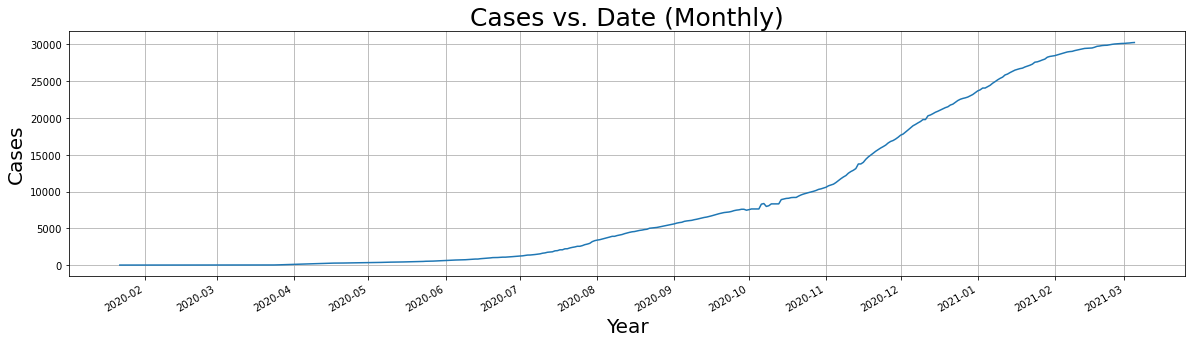

In [9]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(date_mo['date'], date_mo['cases'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
plt.gcf().autofmt_xdate() # Rotation
plt.title('Cases vs. Date (Monthly)', fontsize=25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Cases", fontsize = 20)
plt.savefig("output/rona_13.png")
plt.grid(True)
plt.show()

In [10]:
all_casesx = mo_df['cases']
all_deathsy = mo_df['deaths']

In [11]:
plt.scatter(all_casesx["cases"], all_deathsy["deaths"], facecolor ="blue")
plt.title(f"Cases Vs. Deaths")
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(all_casesx, all_casesx)
regress_values = all_casesx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(all_casesx,all_deathsy)
plt.plot(all_casesx,regress_values,"r-")
plt.annotate(line_eq,(5000,300),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

KeyError: 'cases'

<Figure size 432x288 with 0 Axes>

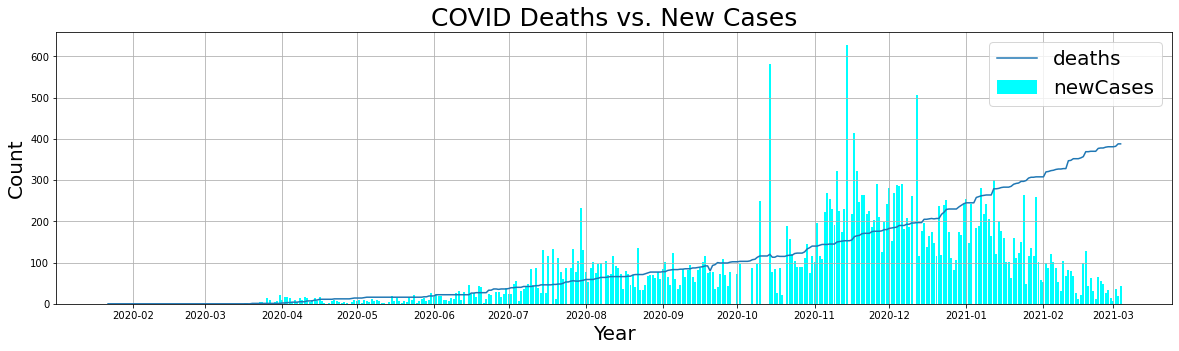

In [10]:
plt.figure()
plt.figure(figsize=(20,5))
deaths=plt.plot(date_mo['date'], date_mo['deaths'], label="deaths")
newCases= plt.bar(date_mo['date'], date_mo['newCases'], label = "newCases", color=['cyan'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
plt.legend (loc="upper right", fontsize = 20)
plt.title('COVID Deaths vs. New Cases', fontsize=25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.grid(True)
plt.savefig("output/rona_12.png")
plt.show()

In [11]:
date_std=np.std(date_mo.newCases)
date_std

91.84643635836953

In [12]:
std=by

NameError: name 'by' is not defined

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(17, 5))
sns.lineplot(x = "date", y = "newCases",data=date_mo)
plt.show()

In [ ]:
date_mo_casesx = date_mo['cases']
date_mo_deathsy = date_mo['deaths']

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(17, 5))
plt.scatter(date_mo["cases"], date_mo["deaths"], facecolor ="blue")
plt.title(f"Cases Vs. Deaths")
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(date_mo_casesx, date_mo_deathsy)
regress_values = date_mo_casesx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(date_mo_casesx,date_mo_deathsy)
plt.plot(date_mo_casesx,regress_values,"r-")
plt.annotate(line_eq,(5000,300),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

In [13]:
before_df = date_mo[(date_mo['date'] > '2020-01-1') & (date_mo['date'] <= '2020-03-16')]
before_df

,date,cases,deaths,newCases
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0
6,2020-01-28,0.0,0.0,0.0
7,2020-01-29,0.0,0.0,0.0
8,2020-01-30,0.0,0.0,0.0
9,2020-01-31,0.0,0.0,0.0


In [14]:
# plt.figure(figsize=(20,10))
# plt.plot(before_df['date'], before_df['cases'], before_df['deaths'], before_df['newCases'], color='red', marker='o')
# plt.title('Unemployment Rate Vs Year', fontsize=14)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Unemployment Rate', fontsize=14)
# plt.grid(True)
# #plt.show()

In [15]:
fqtr_casesx = date_mo['cases']
fqtr_deathsy = date_mo['deaths']

In [16]:
firstqtr_df = date_mo[(date_mo['date'] > '2020-03-01') & (date_mo['date'] <= '2020-06-30')]
firstqtr_df

,date,cases,deaths,newCases
40,2020-03-02,0.0,0.0,0.0
41,2020-03-03,0.0,0.0,0.0
42,2020-03-04,0.0,0.0,0.0
43,2020-03-05,0.0,0.0,0.0
44,2020-03-06,0.0,0.0,0.0
...,...,...,...,...
156,2020-06-26,1103.0,36.0,29.0
157,2020-06-27,1132.0,35.0,29.0
158,2020-06-28,1149.0,36.0,17.0
159,2020-06-29,1172.0,36.0,23.0


The r-squared is: 0.9822781394426628


<function matplotlib.pyplot.show>

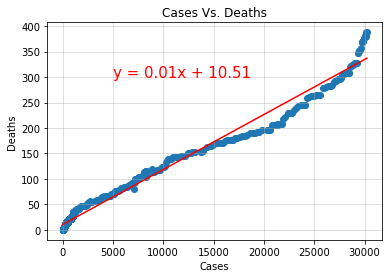

In [17]:
plt.scatter(firstqtr_df["cases"], firstqtr_df["deaths"], facecolor ="blue")
plt.title(f"Cases Vs. Deaths")
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fqtr_casesx, fqtr_deathsy)
regress_values = fqtr_casesx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(fqtr_casesx,fqtr_deathsy)
plt.plot(fqtr_casesx,regress_values,"r-")
plt.annotate(line_eq,(5000,300),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

In [18]:
sqtr_casesx = date_mo['cases']
sqtr_deathsy = date_mo['deaths']

In [19]:
secqtr_df = date_mo[(date_mo['date'] > '2020-07-01') & (date_mo['date'] <= '2020-12-30')]
secqtr_df

,date,cases,deaths,newCases
162,2020-07-02,1257.0,39.0,24.0
163,2020-07-03,1306.0,39.0,49.0
164,2020-07-04,1361.0,40.0,55.0
165,2020-07-05,1367.0,40.0,6.0
166,2020-07-06,1399.0,40.0,32.0
...,...,...,...,...
339,2020-12-26,22654.0,230.0,112.0
340,2020-12-27,22735.0,230.0,81.0
341,2020-12-28,22842.0,230.0,107.0
342,2020-12-29,23016.0,235.0,174.0


The r-squared is: 0.9822781394426628


<function matplotlib.pyplot.show>

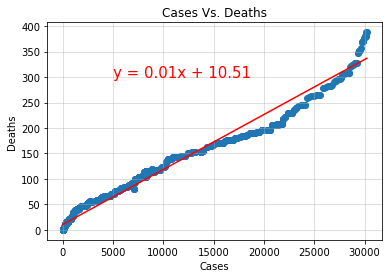

In [20]:
plt.scatter(secqtr_df["cases"], secqtr_df["deaths"], facecolor ="blue")
plt.title(f"Cases Vs. Deaths")
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(sqtr_casesx, sqtr_deathsy)
regress_values = sqtr_casesx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sqtr_casesx,fqtr_deathsy)
plt.plot(sqtr_casesx,regress_values,"r-")
plt.annotate(line_eq,(5000,300),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

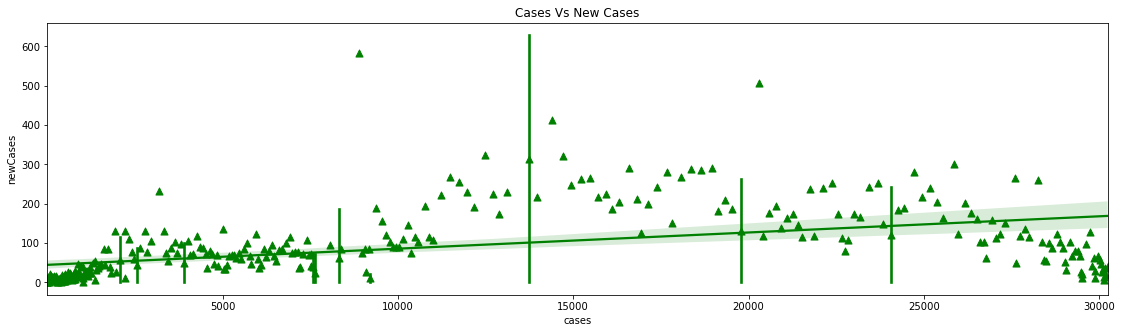

In [21]:
plt.figure(figsize=(19, 5))
plt.title(f"Cases Vs New Cases")
plt.xlabel('Cases')
ax = sns.regplot(x="cases", y="newCases", data=mo_df,
                 x_estimator=np.mean, logx= False, ci =99, color="green", marker ="^", x_jitter=.05)

In [84]:
a_rona

,Column1,Date,COVID-19 Cases,COVID-19 Deaths,COVID-19 New Cases,Crimes,Unemployment Rate (%),Unemployment
0,0,1/1/2020,0,0,0,0,4.3,15683
1,1,2/1/2020,0,0,0,0,3.9,14354
2,2,3/1/2020,360,12,77,0,4.4,16106
3,3,4/1/2020,6908,253,246,0,11.4,40281
4,4,5/1/2020,13746,497,273,0,11.6,41145
5,5,6/1/2020,26685,795,616,0,8.8,31967
6,6,7/1/2020,63490,1444,2110,0,8.6,31744
7,7,8/1/2020,139952,2099,2201,0,8.8,32069
8,8,9/1/2020,199999,2685,2067,0,5.5,19584
9,9,10/1/2020,277068,3596,2762,11871,4.9,17235


<Figure size 432x288 with 0 Axes>

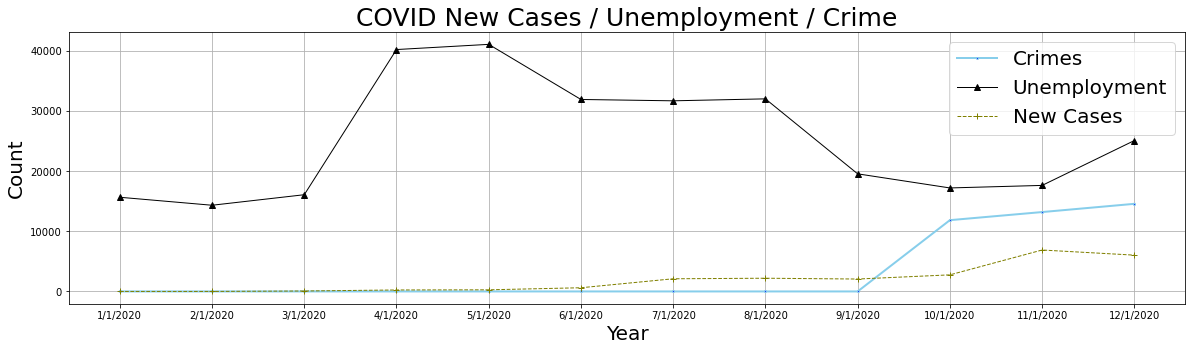

In [98]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot( 'Date', 'Crimes', data=a_rona, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2)
plt.plot( 'Date', 'Unemployment', data=a_rona, marker='^', color='black', linewidth=1)
plt.plot( 'Date', 'COVID-19 New Cases', data=a_rona, marker='+', color='olive', linewidth=1, linestyle='dashed', label="New Cases")
ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
plt.legend (loc="upper right", fontsize = 20)
plt.title('COVID New Cases / Unemployment / Crime', fontsize=25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.grid(True)
plt.savefig("output/rona_1.png")
plt.show()